# <font color='red'> Fraud Detection

### Data Set Information:
This dataset is taken from a research explained here. 

The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200).

There are two csv files to present data. Please merge these two datasets into one dataframe. All the steps should be done in Python. Please don't make any changes in csv files. Consider ``Audit_Risk`` as target columns for regression tasks, and ``Risk`` as the target column for classification tasks. 

### Attribute Information:
Many risk factors are examined from various areas like past records of audit office, audit-paras, environmental conditions reports, firm reputation summary, on-going issues report, profit-value records, loss-value records, follow-up reports etc. After in-depth interview with the auditors, important risk factors are evaluated and their probability of existence is calculated from the present and past records.


### Relevant Papers:
Hooda, Nishtha, Seema Bawa, and Prashant Singh Rana. 'Fraudulent Firm Classification: A Case Study of an External Audit.' Applied Artificial Intelligence 32.1 (2018): 48-64.

## Data preprocessing 

In [1]:
#Importing required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import mglearn

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data
data_audit = pd.read_csv('audit_risk.csv')
data_risk = pd.read_csv('trial.csv')

In [3]:
# checking the head of data
data_audit.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [4]:
# checking the head of data
data_risk.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [5]:
# checking the shape of data
data_risk.shape

(776, 18)

In [6]:
# checking the shape of data
data_audit.shape

(776, 27)

In [7]:
# storing the columns of data
col_risk = data_risk.columns
col_aud = data_audit.columns

In [8]:
# printing data info for checking any missing or non-consistent columns in the data
data_audit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       775 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

In [9]:
# printing data info for checking any missing or non-consistent columns in the data
data_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
Sector_score     776 non-null float64
LOCATION_ID      776 non-null object
PARA_A           776 non-null float64
SCORE_A          776 non-null int64
PARA_B           776 non-null float64
SCORE_B          776 non-null int64
TOTAL            776 non-null float64
numbers          776 non-null float64
Marks            776 non-null int64
Money_Value      775 non-null float64
MONEY_Marks      776 non-null int64
District         776 non-null int64
Loss             776 non-null int64
LOSS_SCORE       776 non-null int64
History          776 non-null int64
History_score    776 non-null int64
Score            776 non-null float64
Risk             776 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 109.2+ KB


In [10]:
# imputing mean value of the column for missing rows
data_audit.loc[:,['Money_Value']]=data_audit.loc[:,['Money_Value']].fillna(data_audit.loc[:,['Money_Value']].mean())
data_risk.loc[:,['Money_Value']]=data_risk.loc[:,['Money_Value']].fillna(data_risk.loc[:,['Money_Value']].mean())

In [11]:
# checking for same column names for joining data frames
q = []
for i in col_risk:
    if i in col_aud:q.append(i)
q

['Sector_score',
 'LOCATION_ID',
 'PARA_A',
 'PARA_B',
 'TOTAL',
 'numbers',
 'Money_Value',
 'History',
 'Score',
 'Risk']

In [12]:
# checking for same column names for joining data frames
for i in q:
    print(data_risk[i].equals(data_audit[i]))

True
True
True
True
True
True
True
True
True
False


In [13]:
# printing all the unique elements in the data frames for thorough verification of missing or inconsistent data values in 
# data_audit.
unique_name = list()
for i in col_aud:
    a = data_audit[i].unique()
    unique_name.append(a)
for i in range(0,len(col_aud)):
    print(col_aud[i],':\n')
    print(np.sort(unique_name[i]),'\n')
    print(len(np.unique(unique_name[i])),'\n')

Sector_score :

[ 1.85  1.99  2.34  2.36  2.37  2.72  3.41  3.89 15.56 17.68 21.61 55.57
 59.85] 

13 

LOCATION_ID :

['1' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21' '22' '23'
 '24' '25' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35' '36' '37' '38'
 '39' '4' '40' '41' '42' '43' '44' '5' '6' '7' '8' '9' 'LOHARU' 'NUH'
 'SAFIDON'] 

45 

PARA_A :

[0.000e+00 6.000e-04 1.000e-02 2.000e-02 3.000e-02 4.000e-02 5.000e-02
 6.000e-02 7.000e-02 9.000e-02 1.000e-01 1.100e-01 1.400e-01 1.500e-01
 1.700e-01 1.800e-01 1.900e-01 2.000e-01 2.100e-01 2.300e-01 2.400e-01
 2.500e-01 2.600e-01 2.700e-01 2.800e-01 2.900e-01 3.000e-01 3.100e-01
 3.200e-01 3.300e-01 3.400e-01 3.600e-01 3.700e-01 3.800e-01 3.900e-01
 4.000e-01 4.100e-01 4.200e-01 4.300e-01 4.400e-01 4.500e-01 4.600e-01
 4.700e-01 4.800e-01 4.900e-01 5.000e-01 5.100e-01 5.200e-01 5.300e-01
 5.400e-01 5.500e-01 5.600e-01 5.700e-01 5.800e-01 5.900e-01 6.000e-01
 6.100e-01 6.200e-01 6.300e-01 6.400e-01 6.500e-01 6.600e-01 6.70

In [14]:
# printing all the unique elements in the data frames for thorough verification of missing or inconsistent data values in 
# data_risk.
unique_name = list()
for i in col_risk:
    a = data_risk[i].unique()
    unique_name.append(a)
for i in range(0,len(col_risk)):
    print(col_risk[i],':\n')
    print(np.sort(unique_name[i]),'\n')
    print(len(np.unique(unique_name[i])),'\n')

Sector_score :

[ 1.85  1.99  2.34  2.36  2.37  2.72  3.41  3.89 15.56 17.68 21.61 55.57
 59.85] 

13 

LOCATION_ID :

['1' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21' '22' '23'
 '24' '25' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35' '36' '37' '38'
 '39' '4' '40' '41' '42' '43' '44' '5' '6' '7' '8' '9' 'LOHARU' 'NUH'
 'SAFIDON'] 

45 

PARA_A :

[0.000e+00 6.000e-04 1.000e-02 2.000e-02 3.000e-02 4.000e-02 5.000e-02
 6.000e-02 7.000e-02 9.000e-02 1.000e-01 1.100e-01 1.400e-01 1.500e-01
 1.700e-01 1.800e-01 1.900e-01 2.000e-01 2.100e-01 2.300e-01 2.400e-01
 2.500e-01 2.600e-01 2.700e-01 2.800e-01 2.900e-01 3.000e-01 3.100e-01
 3.200e-01 3.300e-01 3.400e-01 3.600e-01 3.700e-01 3.800e-01 3.900e-01
 4.000e-01 4.100e-01 4.200e-01 4.300e-01 4.400e-01 4.500e-01 4.600e-01
 4.700e-01 4.800e-01 4.900e-01 5.000e-01 5.100e-01 5.200e-01 5.300e-01
 5.400e-01 5.500e-01 5.600e-01 5.700e-01 5.800e-01 5.900e-01 6.000e-01
 6.100e-01 6.200e-01 6.300e-01 6.400e-01 6.500e-01 6.600e-01 6.70

In [15]:
#dropping duplicate rows
data_audit1 = data_audit.drop_duplicates()
data_risk1=data_risk.drop_duplicates()

In [16]:
# joining the dataframes
new_df = pd.merge(data_audit1, data_risk1,on=['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers','Money_Value','History','Score'])

In [17]:
# printing dataframe columns
new_df.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk_x', 'SCORE_A', 'SCORE_B', 'Marks',
       'MONEY_Marks', 'District', 'Loss', 'LOSS_SCORE', 'History_score',
       'Risk_y'],
      dtype='object')

In [18]:
# finding the columns that are linear transform of each other

print(new_df['Score_MV'].equals(new_df['MONEY_Marks']/10))
print(new_df['PROB'].equals(new_df['LOSS_SCORE']/10))
print(new_df['Prob'].equals(new_df['History_score']/10))
print(new_df['District_Loss'].equals(new_df['District']))
print(new_df['Score_B.1'].equals(new_df['Marks']/10))
print(new_df['Score_A'].equals(new_df['SCORE_A']/10))
print(new_df['Score_B'].equals(new_df['SCORE_B']/10))


True
True
True
True
True
True
True


We have multiple derived columns in the data, while some of these derived columns can be detected using correlation others can be eliminated based on the knowledge that we get from the research paper. We are using a correlation of greater than 0.9 which is a general standard to check for multicollinearity. "First, selecting the level of the correlation coefficient that represents a problem is arbitrary. While multicollinearity is almost certain to be a problem with correlation coefficients over 0.9, it may occur at lower levels." [An overview of techniques for dealing with large numbers of independent variables in epidemiologic studies by IR Dohoo, C Ducrot, C Fourichon, A Donald]

We can see from the head of data that Risk_E+Risk_F is equal to control risk and Risk_A+Risk_B+Risk_C+Risk_D+Risk_E+Risk_F is equal to inherent risk. So there is no need to keep these two columns.

Detection risk is 0.5 for all rows, since there is no variability in the column, this can be dropped.

On initial glimpse we see that there are many columns which are just scaled down versions of these columns or there names were different in the two files.

Let's look at these relations and try to justify them.


Drop one of the two columns and inherent risk and control risk

In [19]:
# dropping the linearly transformed columns.
new_df1=new_df.drop(['Score_MV','PROB','Prob','Detection_Risk','LOCATION_ID','District_Loss','Score_B.1','SCORE_A','SCORE_B','Inherent_Risk','CONTROL_RISK'],axis=1)

In [20]:

District = new_df1['District']
new_df1.drop(labels=['District'], axis=1,inplace = True)
new_df1.insert(0, 'District', District)
cor = new_df1.corr()
corr_matrix = cor.abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

In [21]:
# generating correlation matrix
upper

,District,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Risk_F,Score,Audit_Risk,Risk_x,Marks,MONEY_Marks,Loss,LOSS_SCORE,History_score,Risk_y
District,NaN,0.109003,0.127700,0.087413,0.127310,0.082933,0.006549,0.083129,0.093308,0.125199,...,0.070687,0.209063,0.200204,0.399125,0.150658,0.080284,0.036170,0.055227,0.083839,0.312959
Sector_score,NaN,NaN,0.212488,0.417980,0.215317,0.130719,0.210417,0.128688,0.150939,0.149438,...,0.101534,0.329635,0.090077,0.391299,0.167585,0.313937,0.081408,0.084987,0.134424,0.364573
PARA_A,NaN,NaN,NaN,0.494335,0.999277,0.160693,0.355618,0.160618,0.265743,0.132210,...,0.102896,0.423919,0.218880,0.376958,0.138827,0.283084,0.044306,0.042588,0.171202,0.288588
Score_A,NaN,NaN,NaN,NaN,0.502990,0.247950,0.568595,0.246756,0.295824,0.240587,...,0.149330,0.717350,0.200587,0.617862,0.272179,0.474807,0.091572,0.091817,0.263507,0.668401
Risk_A,NaN,NaN,NaN,NaN,NaN,0.164133,0.360367,0.164016,0.269016,0.134158,...,0.105559,0.430160,0.220754,0.383592,0.141426,0.288129,0.044863,0.042701,0.174835,0.286694
PARA_B,NaN,NaN,NaN,NaN,NaN,NaN,0.346575,0.999936,0.994109,0.209116,...,0.195534,0.396568,0.887734,0.256317,0.230030,0.313450,0.044251,0.041972,0.315925,0.160900
Score_B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.347208,0.378068,0.275868,...,0.169967,0.900613,0.206814,0.634668,0.311858,0.564819,0.097432,0.091058,0.308031,0.511017
Risk_B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.994035,0.208873,...,0.194788,0.396414,0.887508,0.254608,0.229745,0.312027,0.044558,0.042309,0.315773,0.159674
TOTAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.216765,...,0.201559,0.432972,0.888060,0.291130,0.237256,0.336096,0.048197,0.045786,0.325670,0.188507
numbers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.201786,0.502386,0.220874,0.307357,0.908033,0.445663,0.002188,0.035115,0.208747,0.195569


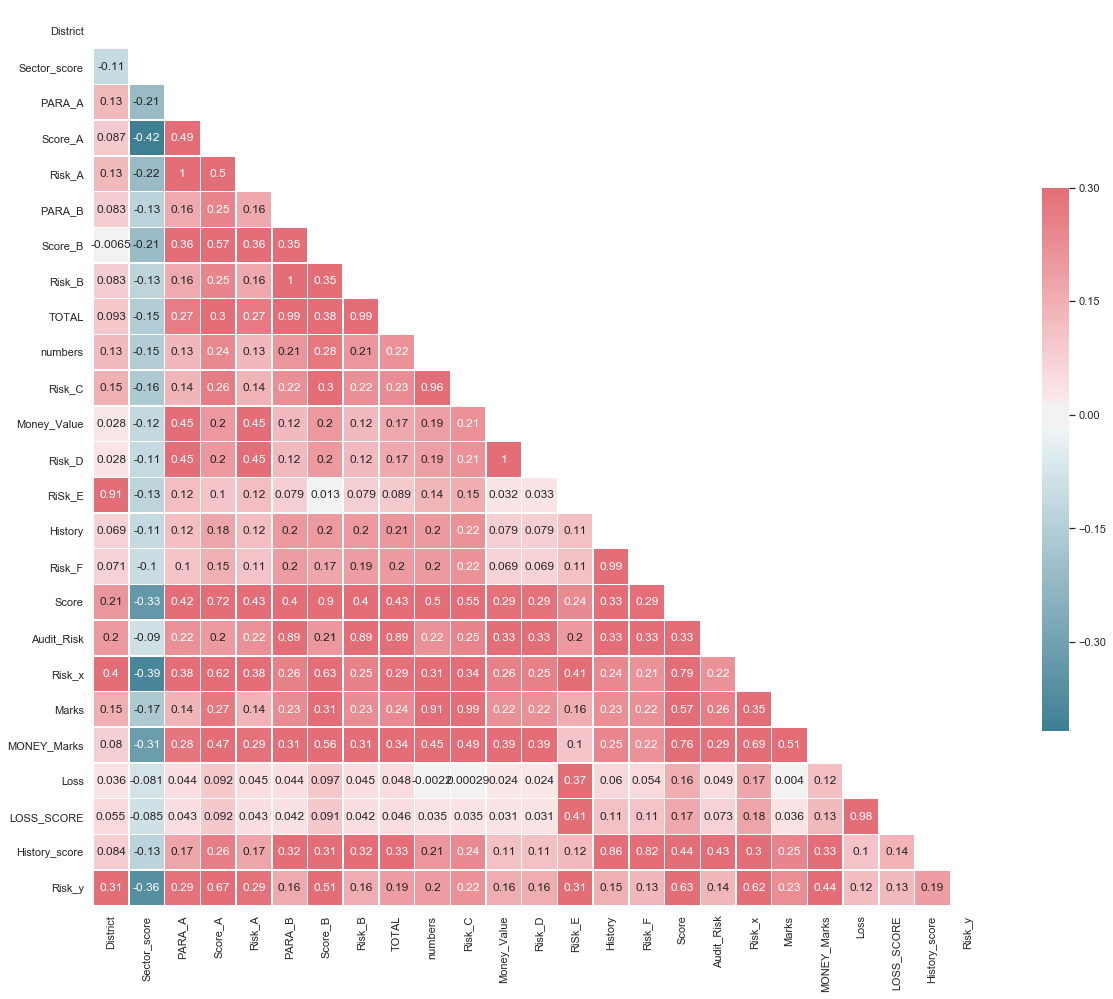

In [22]:
# making heat map of correlation

sns.set(style="white")


# Compute the correlation matrix
corr = new_df1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [23]:
# columns to drop from correlation matrix
to_drop

['Risk_A',
 'Risk_B',
 'TOTAL',
 'Risk_C',
 'Risk_D',
 'RiSk_E',
 'Risk_F',
 'Score',
 'Marks',
 'LOSS_SCORE']

In [24]:
# dropping the columns
new_df2= new_df1.drop(to_drop,axis=1)

In [25]:
# copying dataframe to df
df=new_df2
df.shape

(763, 15)

In [26]:
# dropping outliers from the data
df.drop(df[df['PARA_B']>1000].index,inplace=True)
df.shape

(762, 15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021394695240>,
      dtype=object)

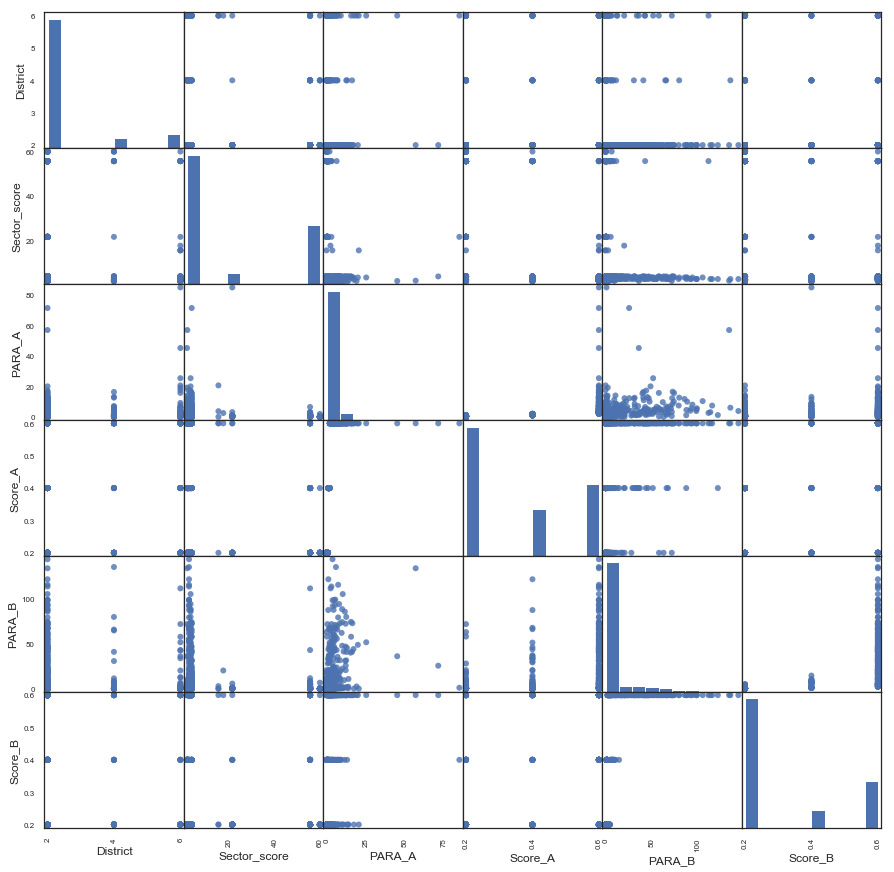

In [27]:
# generating scatter plot for each variable against target variable
from pandas import scatter_matrix
X = df[['District', 'Sector_score', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B',
       'numbers', 'Money_Value', 'History', 
       'MONEY_Marks', 'Loss', 'History_score']]
y = df[['Audit_Risk']]
attributes = X.columns[0:6]
scatter_matrix(X[attributes], figsize = (15,15), alpha = 0.8, marker = 'O')

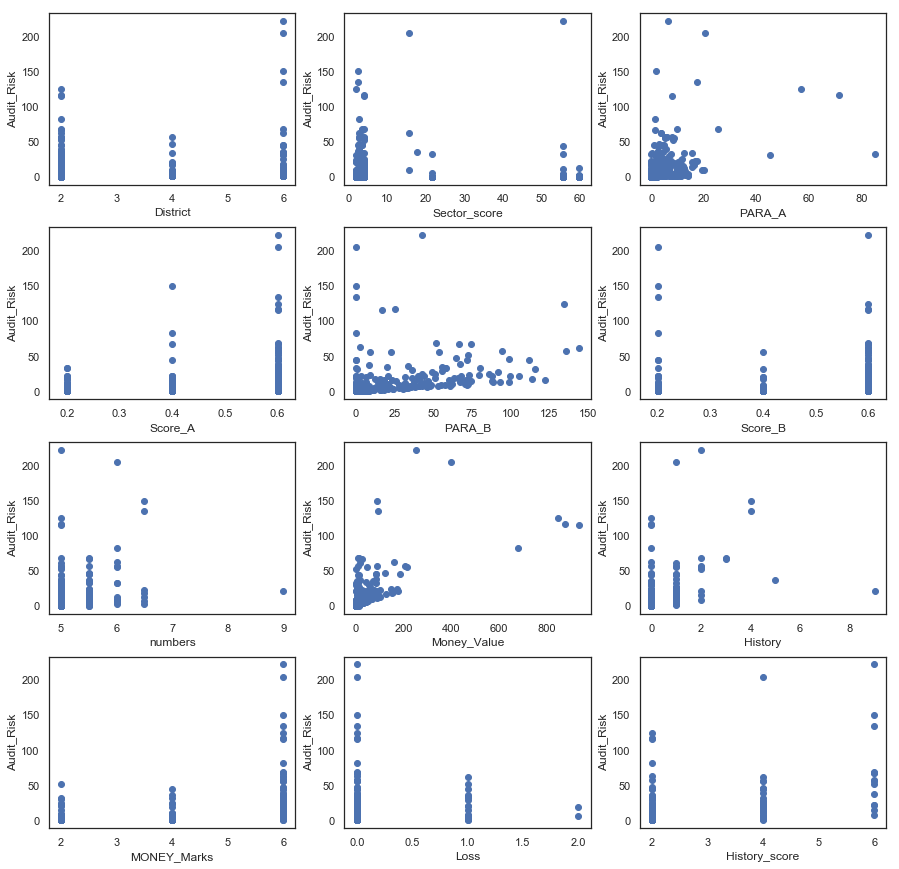

In [28]:
# generating scatter plot for each variable against target variable
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))

columns = 3
rows = 4

for i in range(1, 13):
    if(i<13):
        fig.add_subplot(rows, columns, i)
        plt.scatter(x=X.columns[i-1], y='Audit_Risk',data=df)
        plt.xlabel(X.columns[i-1])
        plt.ylabel('Audit_Risk')
        plt.subplots_adjust(hspace=.25)
    else:
        break

plt.show()

#### What scaling we are using and why?

Standard Scaler used with algorithms where algorithms try to reduce cost function so we are using it for Lasso,Ridge, Support Vector machine algorithms. We are using MinMax Scaler for other algorithms.

## Regression

## KNN Regressor

In [29]:
X = df[['District', 'Sector_score', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B',
       'numbers', 'Money_Value', 'History', 
       'MONEY_Marks', 'Loss', 'History_score']]
y = df[['Audit_Risk']]
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,random_state=0,test_size = 0.25)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

param_grid = {'n_neighbors': [1, 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=10, return_train_score=True)

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 5}
Best cross-validation score: 0.68


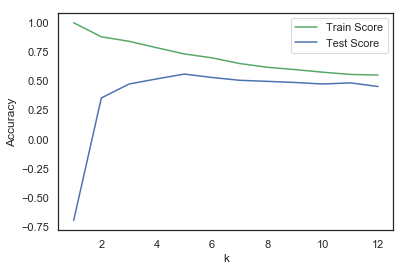

In [30]:
# test train plot
train_score_array = []
test_score_array = []

for k in range(1,13):
    knn = KNeighborsRegressor(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

x_axis = range(1,13)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [31]:
# Cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(KNeighborsRegressor(n_neighbors=5), X_train_org, y_train,cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(KNeighborsRegressor(n_neighbors=5), X_test_org, y_test,cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.0238825  0.46216715 0.67621845 0.47307082 0.37794216]
Average cross-validation score: 0.40
Cross-validation scores: [-0.10727793  0.52562424  0.42721081  0.5046517   0.52634007]
Average cross-validation score: 0.38


### Based on the above analysis, KNN with 5 neighbors gives the optimal result and from the cross validation the accuracy is less than 40%

## Linear Regression

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 5)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

0.7901534255365812
0.6633823098713278


Text(0.5, 0, 'RM')

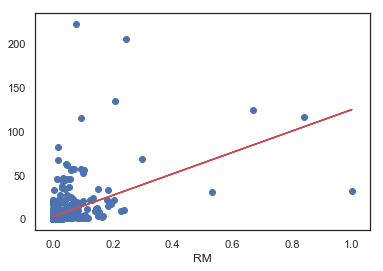

In [33]:
# plotting the best fit line
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,2].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

In [34]:
# cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearRegression(), X_train, y_train,cv=3)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(LinearRegression(), X_test, y_test,cv=3)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ 0.77133753  0.39959221 -0.31758449]
Average cross-validation score: 0.28
Cross-validation scores: [0.90825748 0.88666497 0.89925587]
Average cross-validation score: 0.90


### Based on the above analysis, cross validation the accuracy of Linear Regression is inconsistent

## Lasso

Text(0.5, 0, '$\\alpha$')

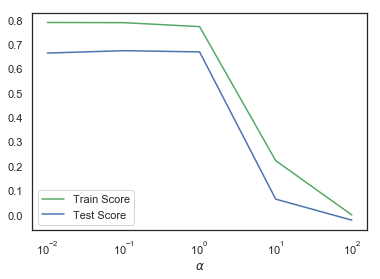

In [35]:
X = df[['District', 'Sector_score', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B',
       'numbers', 'Money_Value', 'History', 
       'MONEY_Marks', 'Loss', 'History_score']]
y = df[['Audit_Risk']]



from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,random_state=5,test_size = 0.25)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))
    
%matplotlib inline

plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

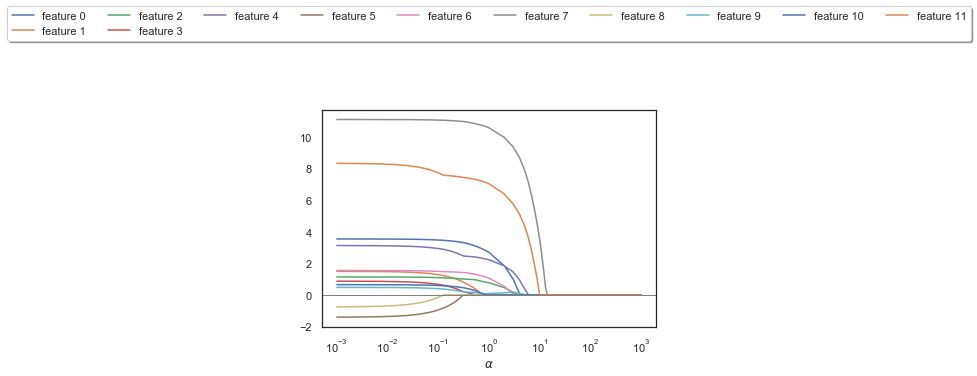

In [36]:
# feature importance plot
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,12):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=10, fancybox=True, shadow=True)
plt.show()

In [37]:
#Grid search
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
grid_search = GridSearchCV(Lasso(), param_grid, cv=5, return_train_score=True)
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,random_state=5,test_size = 0.25)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 1}
Best cross-validation score: 0.71


In [38]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(Lasso(alpha=1), X_train, y_train,cv=3)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(Lasso(alpha=1), X_test, y_test,cv=3)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))




Cross-validation scores: [0.79931113 0.67400057 0.50500125]
Average cross-validation score: 0.66
Cross-validation scores: [0.71943029 0.65794756 0.31714886]
Average cross-validation score: 0.56


### Based on the above analysis, cross validation the accuracy of Lasso regression model is about 56% and the regularization weight is 1

## Ridge

In [488]:
from  sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

param_grid = {'alpha': [0.001,0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(Lasso(), param_grid, cv=5, return_train_score=True)
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,random_state=5,test_size = 0.25)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 1}
Best cross-validation score: 0.71


Text(0.5, 0, '$\\alpha$')

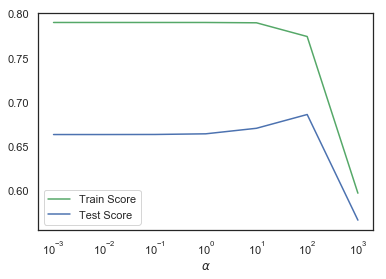

In [489]:
# test train plot
x_range = [0.001,0.01, 0.1, 1, 10, 100,1000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))
%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [490]:
ridge = Ridge(1)
ridge.fit(X_train,y_train)
print(ridge.score(X_train,y_train))
print(ridge.score(X_test, y_test))

0.7901492934808547
0.6641994323103664


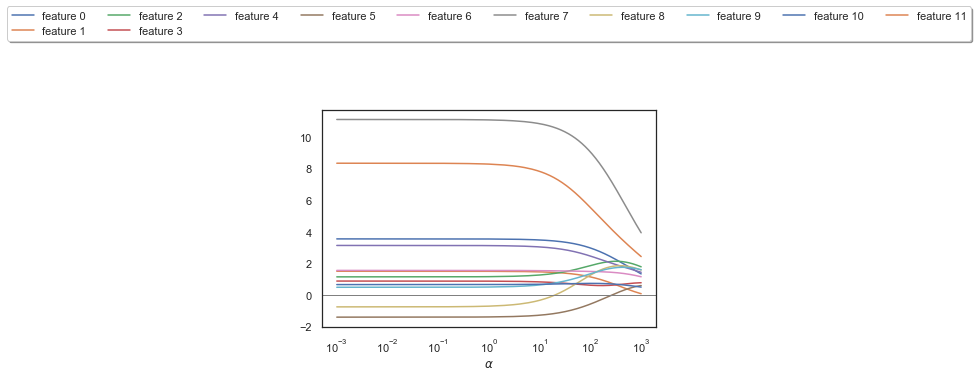

In [491]:
# feature importance

%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)
coeff = coeff[:,0]
for i in range(0,coeff.shape[1]):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=10, fancybox=True, shadow=True)
plt.show()

In [492]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(Ridge(alpha=1), X_train, y_train,cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(Ridge(alpha=1), X_test, y_test,cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ 0.70759433  0.76219353  0.76990982  0.69459407 -0.22170308]
Average cross-validation score: 0.54
Cross-validation scores: [0.94500652 0.11305336 0.90655906 0.79258747 0.70052486]
Average cross-validation score: 0.69


#### Based on the above analysis, cross validation the accuracy of Ridge regression model is about 69% and the regularization weight is 1

## Polynomial Regression

In [493]:
X = df[['District', 'Sector_score', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B',
       'numbers', 'Money_Value', 'History', 
       'MONEY_Marks', 'Loss', 'History_score']]
y = df[['Audit_Risk']]

from sklearn.preprocessing import MinMaxScaler
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LinearRegression
train_score_list = []
test_score_list = []

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,random_state=5,test_size = 0.25)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)
lreg=LinearRegression()

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train_org)
    X_test_poly = poly.transform(X_test_org)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [494]:
print(train_score_list)
print(test_score_list)

[0.7901534255365812, 0.9997164340652305]
[0.6633823098713281, 0.9717122706713539]


Text(0.5, 0, 'RM')

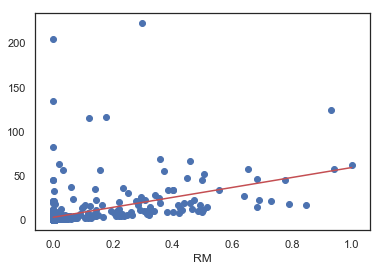

In [495]:
%matplotlib inline
import matplotlib.pyplot as plt
#abc=(X_train[:,5]*X_train[:,4])+(X_train[:,2]*X_train[:,3])+(X_train[:,7]*X_train[:,9])+(X_train[:,8]*X_train[:,11])
abc=(X_train[:,5]*X_train[:,4])
X_train_rm1 = abc.reshape(-1,1)
#X_train_rm1 = X_train_rm1.reshape(-1,1)
lreg.fit(X_train_rm1, y_train)
y_predict = lreg.predict(X_train_rm1)

plt.plot(X_train_rm1, y_predict, c = 'r')
plt.scatter(X_train_rm1,y_train)
plt.xlabel('RM')

In [496]:
from sklearn.model_selection import cross_val_score

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,random_state=5,test_size = 0.25)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


scores = cross_val_score(LinearRegression(), X_train_poly, y_train,cv=4)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(LinearRegression(), X_test_poly, y_test,cv=4)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.94328818 0.91044252 0.96800031 0.77074386]
Average cross-validation score: 0.90
Cross-validation scores: [0.9457465  0.93164694 0.99397739 0.5437367 ]
Average cross-validation score: 0.85


### Based on the above analysis, cross validation the accuracy of polynomial regression model is about 85% for the polynomial degree 2

## Linear SVR

In [497]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,random_state=0,test_size = 0.25)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

param_grid = {'C': [0.001,0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LinearSVR(), param_grid, cv=10, return_train_score=True)

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.1}
Best cross-validation score: 0.67


In [498]:
linear_svm = LinearSVR(0.1)

linear_svm.fit(X_train, y_train)
print(linear_svm.score(X_train, y_train))
print(linear_svm.score(X_test, y_test))

0.6566325406606229
0.8798372249640396


Text(0.5, 0, '$\\alpha$')

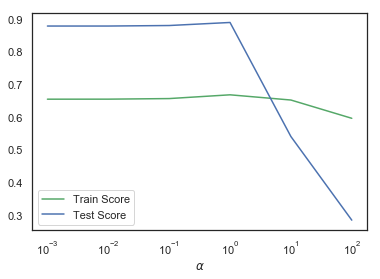

In [499]:
x_range = [0.001,0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for c in x_range: 
    linear_svm = LinearSVR(c)
    linear_svm.fit(X_train,y_train)
    train_score_list.append(linear_svm.score(X_train,y_train))
    test_score_list.append(linear_svm.score(X_test, y_test))
%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [500]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearSVR(C=0.1), X_train, y_train,cv=3)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(LinearSVR(C=0.1), X_test, y_test,cv=3)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.72294899 0.49219289 0.4993104 ]
Average cross-validation score: 0.57
Cross-validation scores: [0.53500331 0.25911724 0.37912214]
Average cross-validation score: 0.39


#### Based on the above analysis, cross validation the accuracy of LinearSVM regression model is about 79% and the regularization weight is 100

## SVR with kernel

In [501]:
#rbf

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100,1000,10000],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             }
print("Parameter grid:\n{}".format(param_grid))
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, return_train_score=True)

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,random_state=0,test_size = 0.25)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 1000, 'gamma': 0.01}
Best cross-validation score: 0.77


In [502]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(SVR(kernel='rbf',gamma=.01,C=1000), X_train, y_train,cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(SVR(kernel='rbf',gamma=0.01,C=1000), X_test, y_test,cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.99097632 0.94845097 0.84119388 0.19930063 0.88916864]
Average cross-validation score: 0.77
Cross-validation scores: [0.7909257  0.87890969 0.53083752 0.83988487 0.8895059 ]
Average cross-validation score: 0.79


#### Based on the above analysis, cross validation the accuracy of RBF SVM regression model is about 80% for the parameters 'C': 1000, 'gamma': 0.01

In [503]:
#poly

param_grid = {'C': [ 10, 100,1000],
              'gamma': [0.0001, 0.001, .01],
              'degree': [1,2,3]
             }
print("Parameter grid:\n{}".format(param_grid))
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
grid_search = GridSearchCV(SVR(kernel='poly'), param_grid, cv=5, return_train_score=True)

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,random_state=0,test_size = 0.25)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'C': [10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01], 'degree': [1, 2, 3]}
Best parameters: {'C': 100, 'degree': 1, 'gamma': 0.001}
Best cross-validation score: 0.63


In [504]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(SVR(kernel='poly',gamma=0.001,C=100,degree=1), X_train, y_train,cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(SVR(kernel='poly',gamma=0.001,C=100,degree=1), X_test, y_test,cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.77692349 0.60108106 0.55629595 0.74839132 0.47410329]
Average cross-validation score: 0.63
Cross-validation scores: [0.52960088 0.51153958 0.38562675 0.57484626 0.61189376]
Average cross-validation score: 0.52


#### Based on the above analysis, cross validation the accuracy of ploy SVM regression model is about 50% for the parameters 'C': 100, 'gamma': 0.001

In [505]:
#linear
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             }
print("Parameter grid:\n{}".format(param_grid))
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
grid_search = GridSearchCV(SVR(kernel='linear'), param_grid, cv=5, return_train_score=True)

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,random_state=0,test_size = 0.25)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 0.1, 'gamma': 0.001}
Best cross-validation score: 0.63


In [506]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(SVR(kernel='linear',C=0.1,gamma=.001), X_train, y_train,cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(SVR(kernel='linear',C=0.1,gamma=.001), X_test, y_test,cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.77692244 0.6010817  0.55626808 0.74839246 0.47411633]
Average cross-validation score: 0.63
Cross-validation scores: [0.52959924 0.51143535 0.38561769 0.57481185 0.61188151]
Average cross-validation score: 0.52


#### Based on the above analysis, cross validation the accuracy of SVM linear regression model is about 50% for the parameters 'C': 0.1, 'gamma': 0.001

### The best model to predict Audit_risk is ploynomial regression with degree 2, since it has the highest test and train scores

### Prediction from the best model

In [507]:
X = df[['District', 'Sector_score', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B',
       'numbers', 'Money_Value', 'History', 
       'MONEY_Marks', 'Loss', 'History_score']]
y = df[['Audit_Risk']]
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,random_state=0,test_size = 0.25)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
plreg = LinearRegression()
plreg.fit(X_train_poly,y_train)
X_pred = poly.transform(scaler.transform(X))
Audit_risk_pred = pd.DataFrame(plreg.predict(X_pred))
Audit_risk_pred.to_csv('Audit_risk_pred.csv')

Checking for RMSE for the regression model predictions

In [508]:
from math import sqrt
squared_error=(np.array(Audit_risk_pred)-np.array(y))**2
sqrt(squared_error.mean())

1.082626943737723

# Classification

<b>Let's discuss about the strategy to be used:</b>
We need to accurately predict the fraudulent comapnies. We need to predict the companies that are fraud but we are fine with even if a few non fraudulent companies are predicted to be fraud. We basically need to reduce the Type ii error. 



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E82C799630>,
      dtype=object)

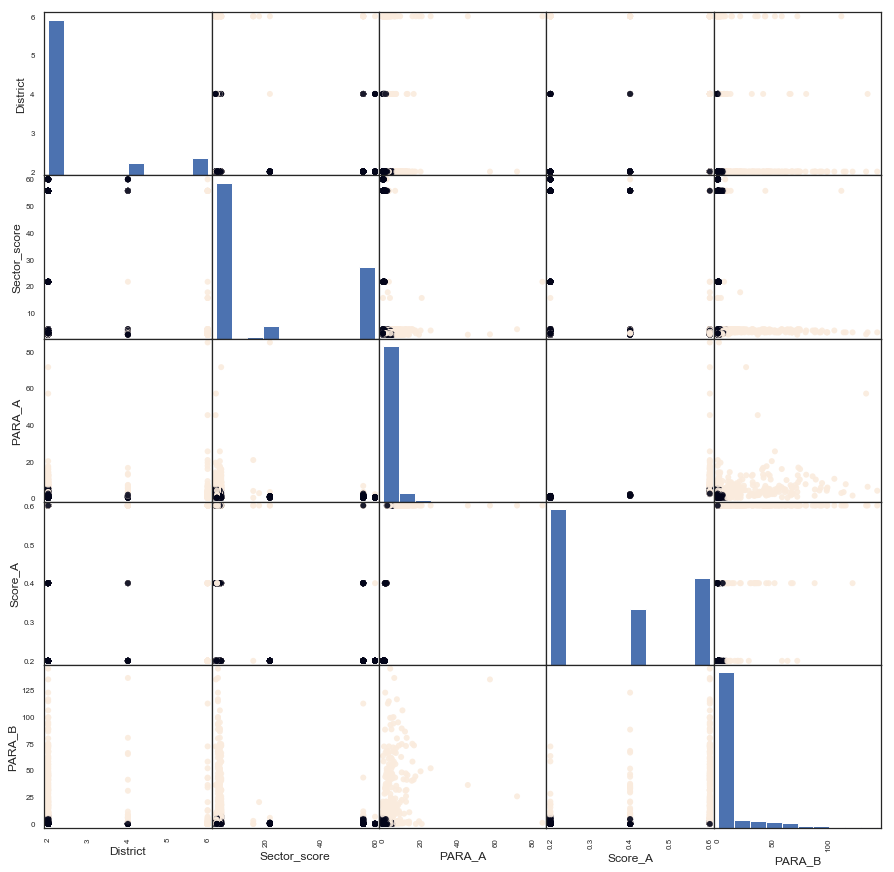

In [509]:
%matplotlib inline
X = df[['District', 'Sector_score', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B',
       'numbers', 'Money_Value', 'History', 
       'MONEY_Marks', 'Loss', 'History_score']]
y = df[['Risk_x']]
from pandas.plotting import scatter_matrix

y1 = np.array(y).reshape(1,-1).flatten()

attributes = X.columns[:5]
scatter_matrix(X[attributes], figsize = (15,15), c = y1, alpha = 0.9, marker = 'O')

We can't really make out much from the plot seems that one class is clustered together and other class is spread out

### Score function

In [510]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc, classification_report, log_loss, precision_score, recall_score, roc_auc_score, roc_curve,matthews_corrcoef
def score_print(y,y_pred):
    a=[]
    b=[]
    a.append('confusion_matrix')
    b.append(confusion_matrix(y,y_pred))
    a.append('accuracy_score')
    b.append(accuracy_score(y,y_pred))
    a.append('precision_score')
    b.append(precision_score(y,y_pred))
    a.append('recall_score')
    b.append(recall_score(y,y_pred))
    a.append('f1_score')
    b.append(f1_score(y,y_pred))
    #a.append('classification_report')
    #b.append(classification_report(y,y_pred))
    a.append('auc')
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    b.append(auc(fpr, tpr))
    a.append('log_loss')
    b.append(log_loss(y,y_pred))
    a.append('matthews_corrcoef')
    b.append(matthews_corrcoef(y,y_pred))
    return pd.DataFrame(b,a)

## Decision Tree

In [511]:
X = df[['District', 'Sector_score', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B',
       'numbers', 'Money_Value', 'History', 
       'MONEY_Marks', 'Loss', 'History_score']]
y = df[['Risk_x']]
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


#X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=0,test_size = 0.25)
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,stratify=y,random_state=3,test_size = 0.25)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

param_grid = {'max_depth': [2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, return_train_score=True,scoring='recall')
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 9}
Best cross-validation score: 0.97


Text(0.5, 0, 'tree_depth')

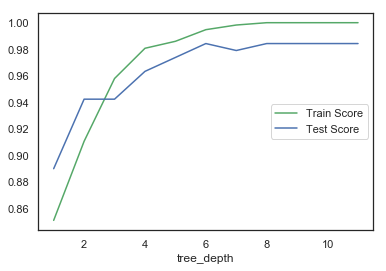

In [512]:
train_score_list =[]
test_score_list=[]
for i in range(1,X_train.shape[1]): 
    dtree = DecisionTreeClassifier(max_depth=i,random_state=0)
    dtree.fit(X_train,y_train)
    train_score_list.append(dtree.score(X_train,y_train))
    test_score_list.append(dtree.score(X_test, y_test))

%matplotlib inline

plt.plot(np.array(range(1,X_train.shape[1])), train_score_list, c = 'g', label = 'Train Score')
plt.plot(np.array(range(1,X_train.shape[1])), test_score_list, c = 'b', label = 'Test Score')
plt.legend(loc = 5)
plt.xlabel('tree_depth')

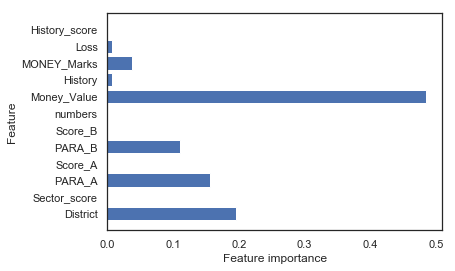

In [513]:
%matplotlib inline
def plot_feature_importances(model):
    n_features = len(X.columns)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
dtree = DecisionTreeClassifier(max_depth=7,random_state=0).fit(X_train,y_train)
plot_feature_importances(dtree)

In [514]:
dtree = DecisionTreeClassifier(max_depth=8, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.984


In [515]:
from sklearn.model_selection import cross_val_score
dtree = DecisionTreeClassifier(max_depth=8, random_state=0)
scores = cross_val_score(dtree, X_train, y_train,cv=10,scoring='recall')
print("Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(dtree, X_test, y_test,cv=10,scoring='recall')
print(" Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))



dtree = DecisionTreeClassifier(max_depth=8, random_state=0)
scores = cross_val_score(dtree, X_train, y_train,cv=10)
print("Accuracy Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(dtree, X_test, y_test,cv=10)
print(" Accuracy Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Recall Cross-validation scores: [1.         1.         0.95652174 1.         0.86956522 0.95652174
 1.         0.90909091 0.95454545 1.        ]
Average cross-validation score: 0.96
 Recall Cross-validation scores: [1.   1.   0.75 1.   1.   1.   1.   1.   1.   1.  ]
Average cross-validation score: 0.97
Accuracy Cross-validation scores: [1.         0.94827586 0.96551724 0.96551724 0.94736842 0.96491228
 0.98245614 0.92857143 0.98214286 0.98214286]
Average cross-validation score: 0.97
 Accuracy Cross-validation scores: [1.         1.         0.9        1.         1.         1.
 1.         1.         0.83333333 1.        ]
Average cross-validation score: 0.97


In [516]:

dtree = DecisionTreeClassifier(max_depth=8, random_state=0)
dtree.fit(X_train,y_train)

y_pred = dtree.predict(scaler.transform(X))
score_print(y,y_pred)

,0
confusion_matrix,"[[458, 1], [2, 301]]"
accuracy_score,0.996063
precision_score,0.996689
recall_score,0.993399
f1_score,0.995041
auc,0.99561
log_loss,0.13598
matthews_corrcoef,0.991781


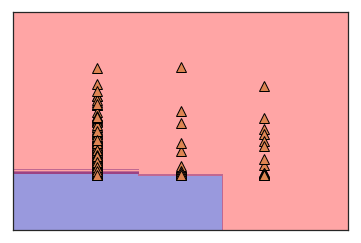

In [517]:
import mglearn
X_b = X_train[:,[0,4]]
y_b = y_train.values.ravel()[:]

dtree = DecisionTreeClassifier(max_depth=8, random_state=0)
dtree.fit(X_b, y_b)

mglearn.plots.plot_2d_separator(dtree, X_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b)

#### Based on the above analysis, for a cross validation average recall of Decision tree classifier model gives 97% for the tree depth of 8 and an accuracy of 97%

## KNN Classifier

In [518]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,stratify=y,random_state=3,test_size = 0.25)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

param_grid = {'n_neighbors': [2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, return_train_score=True,scoring='recall')

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 3}
Best cross-validation score: 0.94


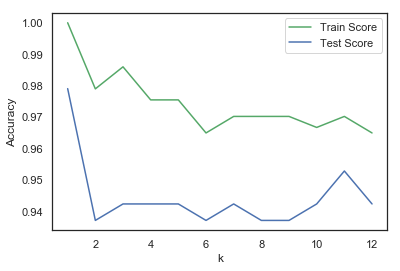

In [519]:
train_score_array = []
test_score_array = []

for k in range(1,13):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

x_axis = range(1,13)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [520]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), X_train_org, y_train,cv=10,scoring='recall')
print("Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), X_test_org, y_test,cv=10,scoring='recall')
print(" Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))


scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), X_train_org, y_train,cv=10)
print("Accuracy Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), X_test_org, y_test,cv=10)
print("Accuracy Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Recall Cross-validation scores: [0.95652174 1.         0.95652174 1.         0.82608696 0.95652174
 1.         0.86363636 0.86363636 1.        ]
Average cross-validation score: 0.94
 Recall Cross-validation scores: [0.875      0.875      0.75       1.         0.625      1.
 1.         0.85714286 0.85714286 1.        ]
Average cross-validation score: 0.88
Accuracy Cross-validation scores: [0.98275862 0.96551724 0.98275862 0.98275862 0.92982456 0.98245614
 1.         0.94642857 0.94642857 1.        ]
Average cross-validation score: 0.97
Accuracy Cross-validation scores: [0.95       0.95       0.9        1.         0.85       1.
 1.         0.88888889 0.94444444 1.        ]
Average cross-validation score: 0.95


In [521]:
knn=KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
y_pred = knn.predict(scaler.transform(X))
score_print(y,y_pred)

,0
confusion_matrix,"[[455, 4], [15, 288]]"
accuracy_score,0.975066
precision_score,0.986301
recall_score,0.950495
f1_score,0.968067
auc,0.97089
log_loss,0.861207
matthews_corrcoef,0.948063


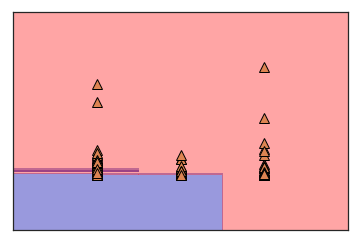

In [522]:
import mglearn
X_b = X_train[:,[0,2]]
y_b = y_train.values.ravel()[:]

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_b, y_b)

mglearn.plots.plot_2d_separator(knn, X_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b)

#### Based on the above analysis by cross validation we see that average recall of KNN Classifier model gives 88% and an average accuracy of 95% for the neighbors = 3

## Logistic Regression

In [523]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,stratify=y,random_state=3,test_size = 0.25)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)
#0.001, 0.01, 0.1
param_grid = {'C':[0.001, 0.01, 0.1,1,10,100],'penalty':['l1','l2'] }
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=10, return_train_score=True,scoring='recall')

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters: {'C': 100, 'penalty': 'l1'}
Best cross-validation score: 0.97


In [524]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100,1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

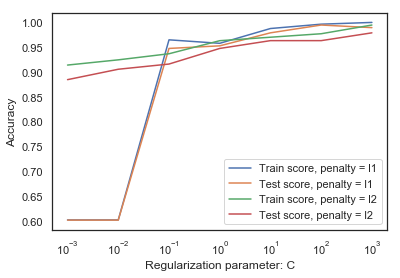

In [525]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [526]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(C=100,penalty='l1'), X_train, y_train,cv=10,scoring='recall')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(LogisticRegression(C=100,penalty='l1'), X_test, y_test,cv=10,scoring='recall')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(LogisticRegression(C=100,penalty='l1'), X_train, y_train,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(LogisticRegression(C=100,penalty='l1'), X_test, y_test,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [1.         1.         1.         1.         0.86956522 1.
 1.         0.90909091 0.95454545 1.        ]
Average cross-validation score: 0.97
Cross-validation scores: [1.    1.    0.75  1.    0.875 1.    1.    1.    1.    1.   ]
Average cross-validation score: 0.96
Cross-validation scores: [1.         0.98275862 1.         1.         0.94736842 1.
 1.         0.96428571 0.98214286 1.        ]
Average cross-validation score: 0.99
Cross-validation scores: [1.         1.         0.9        1.         0.95       1.
 1.         1.         0.83333333 1.        ]
Average cross-validation score: 0.97


In [527]:
l1=LogisticRegression(C=100,penalty='l1').fit(X_train,y_train)
y_pred = l1.predict(scaler.transform(X))
score_print(y,y_pred)

,0
confusion_matrix,"[[458, 1], [2, 301]]"
accuracy_score,0.996063
precision_score,0.996689
recall_score,0.993399
f1_score,0.995041
auc,0.99561
log_loss,0.13598
matthews_corrcoef,0.991781


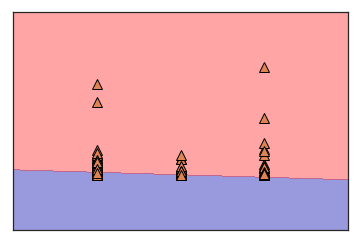

In [528]:
import mglearn
X_b = X_train[:,[0,2]]
y_b = y_train.values.ravel()[:]

l1=LogisticRegression(C=100,penalty='l1').fit(X_b,y_b)

mglearn.plots.plot_2d_separator(l1, X_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b)

#### Based on the above analysis, cross validation the recall of Logistic Regression Classifier model gives 96% and an accuracy of 97% for the c = 100 and penality = l1

## LINEAR SVC

In [529]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,stratify=y,random_state=0,test_size = 0.25)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

param_grid = {'C': [0.001,0.01, 0.1, 1, 10, 100,1000]}
grid_search = GridSearchCV(LinearSVC(), param_grid, cv=10, return_train_score=True,scoring='recall')

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10}
Best cross-validation score: 0.98


In [530]:
linear_svm = LinearSVC(C=10)

linear_svm.fit(X_train, y_train)
print(linear_svm.score(X_train, y_train))
print(linear_svm.score(X_test, y_test))

0.9947460595446584
0.9685863874345549


Text(0.5, 0, 'C')

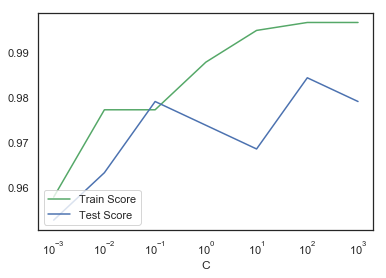

In [531]:
x_range = [0.001,0.01, 0.1, 1, 10, 100,1000]
train_score_list = []
test_score_list = []

for c in x_range: 
    linear_svm = LinearSVC(C=c)
    linear_svm.fit(X_train,y_train)
    train_score_list.append(linear_svm.score(X_train,y_train))
    test_score_list.append(linear_svm.score(X_test, y_test))
%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'C')

In [532]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearSVC(C=10), X_train, y_train,cv=10,scoring='recall')
print("Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(LinearSVC(C=10), X_test, y_test,cv=10,scoring='recall')
print("Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(LinearSVC(C=10), X_train, y_train,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(LinearSVC(C=10), X_test, y_test,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Recall Cross-validation scores: [1.         1.         0.95652174 0.95652174 1.         1.
 0.91304348 0.95454545 1.         1.        ]
Average cross-validation score: 0.98
Recall Cross-validation scores: [0.875 1.    1.    0.875 1.    1.    1.    1.    1.    1.   ]
Average cross-validation score: 0.97
Cross-validation scores: [1.         1.         0.98275862 0.98275862 1.         1.
 0.96491228 0.98214286 1.         0.96428571]
Average cross-validation score: 0.99
Cross-validation scores: [0.95       1.         1.         0.9        1.         0.94736842
 1.         1.         0.94444444 1.        ]
Average cross-validation score: 0.97


In [533]:
linear_svm = LinearSVC(C=10)
linear_svm.fit(X_train,y_train)
y_pred = linear_svm.predict(scaler.transform(X))
score_print(y,y_pred)

,0
confusion_matrix,"[[458, 1], [8, 295]]"
accuracy_score,0.988189
precision_score,0.996622
recall_score,0.973597
f1_score,0.984975
auc,0.985709
log_loss,0.407939
matthews_corrcoef,0.975428


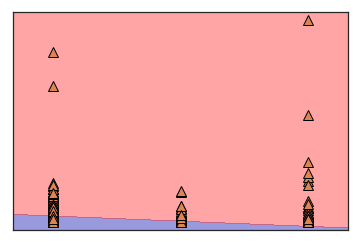

In [534]:
import mglearn
X_b = X_train[:,[0,2]]
y_b = y_train.values.ravel()[:]

linear_svm = LinearSVC(C=10).fit(X_b,y_b)

mglearn.plots.plot_2d_separator(linear_svm, X_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b)

#### Based on the above analysis, cross validation the recall and accuracy of LinearSVC Classifier model gives 97% for the c = 10

## SVM with Kernels

## rbf

In [535]:
#rbf

param_grid = {'C': [0.001, 0.01, .1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             }
print("Parameter grid:\n{}".format(param_grid))
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, return_train_score=True,scoring='recall')

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,stratify=y,random_state=0,test_size = 0.25)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 0.1, 'gamma': 10}
Best cross-validation score: 1.00


In [536]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(SVC(kernel='rbf',gamma=10,C=.1), X_train, y_train,cv=10,scoring='recall')
print("Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(SVC(kernel='rbf',gamma=10,C=.1), X_test, y_test,cv=10,scoring='recall')
print(" Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(SVC(kernel='rbf',gamma=10,C=.1), X_train, y_train,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(SVC(kernel='rbf',gamma=10,C=.1), X_test, y_test,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Recall Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average cross-validation score: 1.00
 Recall Cross-validation scores: [0.375      0.25       0.         0.         0.375      0.125
 0.         0.42857143 1.         0.42857143]
Average cross-validation score: 0.30
Cross-validation scores: [0.86206897 0.9137931  0.87931034 0.89655172 0.9122807  0.87719298
 0.80701754 0.89285714 0.92857143 0.94642857]
Average cross-validation score: 0.89
Cross-validation scores: [0.75       0.7        0.6        0.6        0.75       0.57894737
 0.61111111 0.77777778 0.88888889 0.77777778]
Average cross-validation score: 0.70


Text(0.5, 0, 'C')

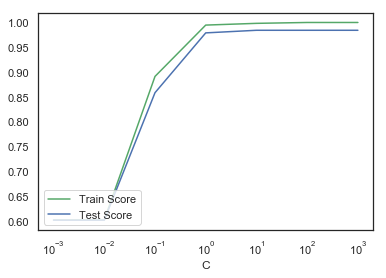

In [537]:
x_range = [0.001,0.01, 0.1, 1, 10, 100,1000]
train_score_list = []
test_score_list = []

for c in x_range: 
    rbf = SVC(C=c,kernel='rbf',gamma=10)
    rbf.fit(X_train,y_train)
    train_score_list.append(rbf.score(X_train,y_train))
    test_score_list.append(rbf.score(X_test, y_test))
%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'C')

In [538]:
rbf = SVC(C=.1,kernel='rbf',gamma=10)
rbf.fit(X_train,y_train)
y_pred = rbf.predict(scaler.transform(X))
score_print(y,y_pred)

,0
confusion_matrix,"[[371, 88], [1, 302]]"
accuracy_score,0.883202
precision_score,0.774359
recall_score,0.9967
f1_score,0.871573
auc,0.902489
log_loss,4.03415
matthews_corrcoef,0.788149


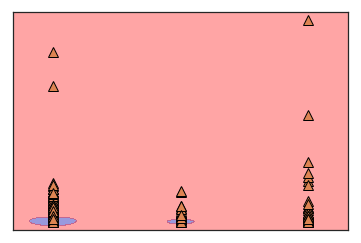

In [539]:
import mglearn
X_b = X_train[:,[0,2]]
y_b = y_train.values.ravel()[:]

rbf = SVC(C=.1,kernel='rbf',gamma=10).fit(X_b,y_b)

mglearn.plots.plot_2d_separator(rbf, X_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b)

#### Based on the above analysis the average  cross validation recall of rbf SVC Classifier model gives 30% and accuracy of 70% for the gamma=10, C=.1

### SVM poly

In [540]:
param_grid = {'C': [ 1,10, 100,1000,10000],
              'gamma': [0.0001, 0.001, .01,.1,1,10],
              'degree': [1,2,3]
             }
print("Parameter grid:\n{}".format(param_grid))
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(kernel='poly'), param_grid, cv=5, return_train_score=True,scoring='recall')

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,stratify=y,random_state=0,test_size = 0.25)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'C': [1, 10, 100, 1000, 10000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'degree': [1, 2, 3]}
Best parameters: {'C': 100, 'degree': 1, 'gamma': 10}
Best cross-validation score: 0.98


In [541]:
from sklearn.model_selection import cross_val_score
#gamma=1,C=100,degree=1
scores = cross_val_score(SVC(kernel='poly',gamma=10,C=100,degree=1), X_train, y_train,cv=10,scoring='recall')
print("Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(SVC(kernel='poly',gamma=10,C=100,degree=1), X_test, y_test,cv=10,scoring='recall')
print("Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(SVC(kernel='poly',gamma=10,C=100,degree=1), X_train, y_train,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(SVC(kernel='poly',gamma=10,C=100,degree=1), X_test, y_test,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Recall Cross-validation scores: [1.         1.         0.95652174 0.95652174 1.         1.
 0.95652174 0.95454545 1.         1.        ]
Average cross-validation score: 0.98
Recall Cross-validation scores: [0.875      1.         1.         1.         1.         1.
 1.         0.85714286 0.71428571 1.        ]
Average cross-validation score: 0.94
Cross-validation scores: [0.98275862 1.         0.98275862 0.98275862 1.         0.98245614
 0.98245614 0.98214286 1.         0.98214286]
Average cross-validation score: 0.99
Cross-validation scores: [0.95       1.         1.         0.95       1.         1.
 1.         0.94444444 0.77777778 1.        ]
Average cross-validation score: 0.96


Text(0.5, 0, 'C')

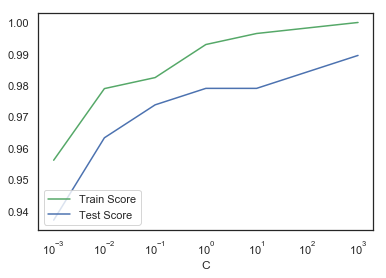

In [542]:
x_range = [0.001,0.01, 0.1, 1, 10, 100,1000]
train_score_list = []
test_score_list = []

for c in x_range: 
    poly_svm = SVC(C=c,kernel='poly',degree=1,gamma=10)
    poly_svm.fit(X_train,y_train)
    train_score_list.append(poly_svm.score(X_train,y_train))
    test_score_list.append(poly_svm.score(X_test, y_test))
%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'C')

In [543]:
poly_svm = SVC(C=100,kernel='poly',degree=1,gamma=1)
poly_svm.fit(X_train,y_train)
y_pred = poly_svm.predict(scaler.transform(X))
score_print(y,y_pred)

,0
confusion_matrix,"[[458, 1], [5, 298]]"
accuracy_score,0.992126
precision_score,0.996656
recall_score,0.983498
f1_score,0.990033
auc,0.99066
log_loss,0.27196
matthews_corrcoef,0.983585


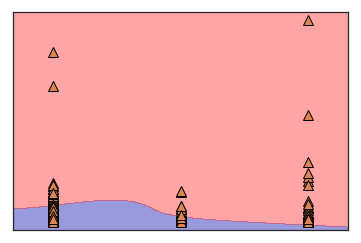

In [544]:
import mglearn
X_b = X_train[:,[0,2]]
y_b = y_train.values.ravel()[:]

poly = SVC(C=100,kernel='poly',gamma=0.1).fit(X_b,y_b)

mglearn.plots.plot_2d_separator(poly, X_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b)

#### Based on the above analysis the average cross validation recall of poly SVC Classifier model is 94% and avearge accuracy is 96% for the 'C': 100, 'degree': 1, 'gamma': 10

## SVC Linear

In [545]:
#linear
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             }
print("Parameter grid:\n{}".format(param_grid))
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, return_train_score=True,scoring='recall')

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,stratify=y,random_state=0,test_size = 0.25)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 10, 'gamma': 0.001}
Best cross-validation score: 0.98


In [546]:
from sklearn.model_selection import cross_val_score
#C=100,gamma=.001
scores = cross_val_score(SVC(kernel='linear',C=10,gamma=.001), X_train, y_train,cv=5,scoring='recall')
print("Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(SVC(kernel='linear',C=10,gamma=.001), X_test, y_test,cv=5,scoring='recall')
print("Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(SVC(kernel='linear',C=10,gamma=.001), X_train, y_train,cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(SVC(kernel='linear',C=10,gamma=.001), X_test, y_test,cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Recall Cross-validation scores: [1.         0.95652174 0.97777778 0.95555556 1.        ]
Average cross-validation score: 0.98
Recall Cross-validation scores: [0.9375     0.8        0.93333333 1.         0.93333333]
Average cross-validation score: 0.92
Cross-validation scores: [1.         0.9826087  0.99122807 0.98245614 0.99115044]
Average cross-validation score: 0.99
Cross-validation scores: [0.97435897 0.89473684 0.92105263 1.         0.94736842]
Average cross-validation score: 0.95


Text(0.5, 0, 'C')

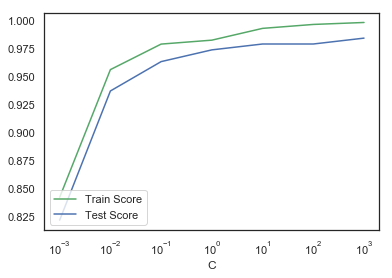

In [547]:
x_range = [0.001,0.01, 0.1, 1, 10, 100,1000]
train_score_list = []
test_score_list = []

for c in x_range: 
    linear_svc = SVC(C=c,kernel='linear',gamma=.001)
    linear_svc.fit(X_train,y_train)
    train_score_list.append(linear_svc.score(X_train,y_train))
    test_score_list.append(linear_svc.score(X_test, y_test))
%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'C')

In [548]:
linear_svc = SVC(C=100,kernel='linear',gamma=.001)
linear_svc.fit(X_train,y_train)
y_pred = linear_svc.predict(scaler.transform(X))
score_print(y,y_pred)

,0
confusion_matrix,"[[458, 1], [5, 298]]"
accuracy_score,0.992126
precision_score,0.996656
recall_score,0.983498
f1_score,0.990033
auc,0.99066
log_loss,0.27196
matthews_corrcoef,0.983585


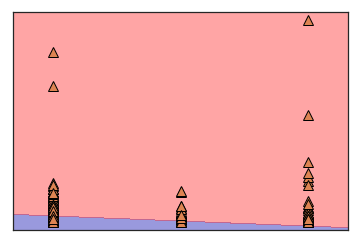

In [549]:
import mglearn
X_b = X_train[:,[0,2]]
y_b = y_train.values.ravel()[:]

linear_svc = SVC(C=10,kernel='linear',gamma=0.001).fit(X_b,y_b)

mglearn.plots.plot_2d_separator(linear_svc, X_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b)

#### Based on the above analysis the average cross validation  recall of  SVC Classifier with linear kernel model is 92% and the average accuracy is 95% for the 'C': 10, 'gamma': 0.001

We looked at all the scores in order to judge the best model to choose from but the major factor that we looked at was the average Recall score for the models because we wanted a accurate classifier with least type 2 error.
#### Based on cross validation recall scores the best way to classify Fraudulent comapnaies is LinearSVC  model with C=10 which has 97% recall and accuracy on average or we can use Decision tree with max depth=8